In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
import re
import unicodedata
from collections import OrderedDict
#nltk.download('wordnet')

In [2]:
data = pd.read_csv(r"C:\Users\hvvel\Downloads/original+bt_data.csv",engine='python')

In [3]:
data = data.sample(frac=1)
data['text_data'] = data.text_data.str.lower()
data['text_data'] = data.text_data.str.replace('(\\b[A-Za-z] \\b|\\b [A-Za-z]\\b)', '')
data['transformed_text_data'] = (data['text_data'].str.split()
                              .apply(lambda x: OrderedDict.fromkeys(x).keys())
                              .str.join(' '))
data_profane = data[data['profane_class']==1]
data_profane.head(10)

,Unnamed: 0,text_data,profane_class,transformed_text_data
49686,49686,"lmao denote has bitch here right now, but he l...",1,"lmao denote has bitch here right now, but he l..."
57890,57890,yeah fucking lunch ill just eat pussy under th...,1,yeah fucking lunch ill just eat pussy under th...
26207,26207,ok seriously fucks people who hit on their bre...,1,ok seriously fucks people who hit on their bre...
26232,26232,everybody stay yelling its pregant season nooo...,1,everybody stay yelling its pregant season nooo...
77039,77039,you can masturbate anytime bitch lol just wan...,1,you can masturbate anytime bitch lol just want...
55572,55572,removing cum stains from the faggots that jack...,1,removing cum stains from the faggots that jack...
58186,58186,who the fck put you in charge create an accou...,1,who the fck put you in charge create an accoun...
80112,80112,the dangling semi occured in the driver an el...,1,the dangling semi occured in driver an elyrian...
68391,68391,my mother raised pussy lol,1,my mother raised pussy lol
85137,85137,yeh well ban me fukkers fuck you morons,1,yeh well ban me fukkers fuck you morons


In [4]:
def basic_clean(text):
  """
  A simple function to clean up the data. All the words that
  are not designated as a stop word is then lemmatized after
  encoding and basic regex parsing are performed.
  """
  wnl = nltk.stem.WordNetLemmatizer()
  ADDITIONAL_STOPWORDS = ['wikipedia', 'im', 'know', 'get', 'see', 'also', 'would', 'one', 'article', 'even', 'go', 'te', 'se', 'od']
  stopwordss = stopwords.words('english') + ADDITIONAL_STOPWORDS
  text = (unicodedata.normalize('NFKD', text)
    .encode('ascii', 'ignore')
    .decode('utf-8', 'ignore')
    .lower())
  words = re.sub(r'[^\w\s]', '', text).split()
  return [wnl.lemmatize(word) for word in words if word not in stopwordss]

In [5]:
words = basic_clean(''.join(str(data['transformed_text_data'].tolist())))
words_profane = basic_clean(''.join(str(data_profane['transformed_text_data'].tolist())))

In [7]:
unigrams_series = (pd.Series(nltk.ngrams(words, 1)).value_counts())[:20]
bigrams_series = (pd.Series(nltk.ngrams(words, 2)).value_counts())[:20]
trigrams_series = (pd.Series(nltk.ngrams(words, 3)).value_counts())[:20]
unigrams = unigrams_series.sort_values().values
bigrams = bigrams_series.sort_values().values
trigrams = trigrams_series.sort_values().values

C:\Users\hvvel\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  import sys


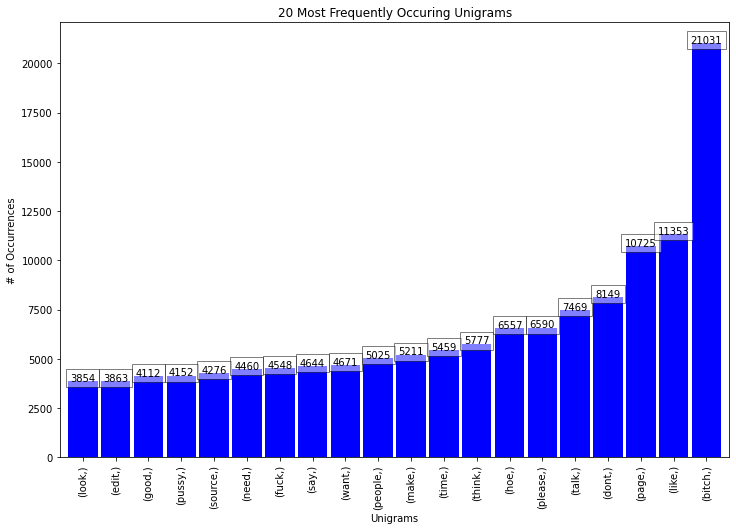

In [8]:
unigrams_series.sort_values().plot.bar(color='blue', width=.9, figsize=(12, 8))
plt.title('20 Most Frequently Occuring Unigrams')
plt.xlabel('Unigrams')
plt.ylabel('# of Occurrences')
for i in range(len(unigrams)):
    plt.text(i, unigrams[i], unigrams[i], ha = 'center',
                 Bbox = dict(facecolor = 'white', alpha = .5))

C:\Users\hvvel\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  import sys


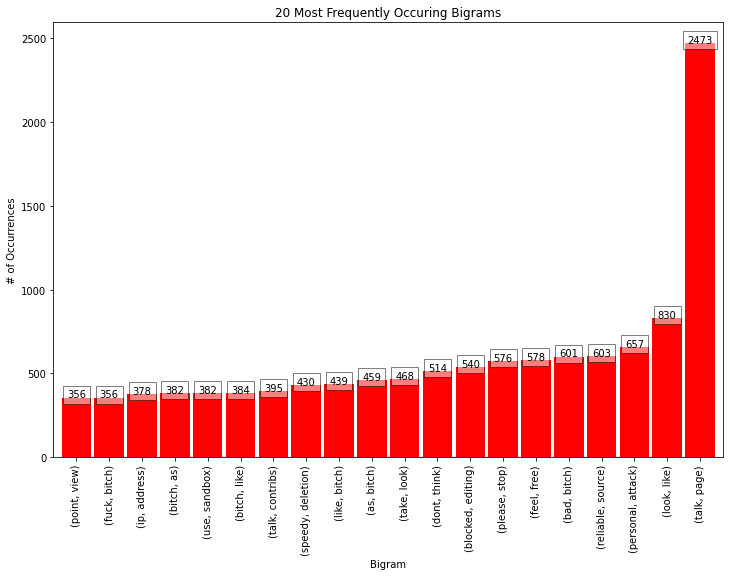

In [10]:
bigrams_series.sort_values().plot.bar(color='red', width=.9, figsize=(12, 8))
plt.title('20 Most Frequently Occuring Bigrams')
plt.xlabel('Bigram')
plt.ylabel('# of Occurrences')
for i in range(len(bigrams)):
    plt.text(i, bigrams[i], bigrams[i], ha = 'center',
                 Bbox = dict(facecolor = 'white', alpha = .5))

C:\Users\hvvel\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  import sys


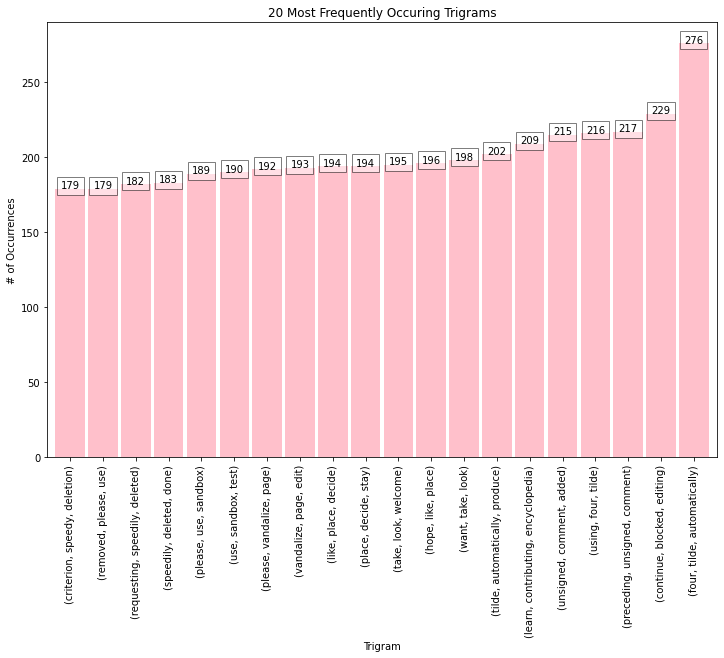

In [11]:
trigrams_series.sort_values().plot.bar(color='pink', width=.9, figsize=(12, 8))
plt.title('20 Most Frequently Occuring Trigrams')
plt.xlabel('Trigram')
plt.ylabel('# of Occurrences')
for i in range(len(trigrams)):
    plt.text(i, trigrams[i], trigrams[i], ha = 'center',
                 Bbox = dict(facecolor = 'white', alpha = .5))

In [12]:
unigrams_series_p = (pd.Series(nltk.ngrams(words_profane, 1)).value_counts())[:20]
bigrams_series_p = (pd.Series(nltk.ngrams(words_profane, 2)).value_counts())[:20]
trigrams_series_p = (pd.Series(nltk.ngrams(words_profane, 3)).value_counts())[:20]
unigrams_p = unigrams_series_p.sort_values().values
bigrams_p = bigrams_series_p.sort_values().values
trigrams_p = trigrams_series_p.sort_values().values

C:\Users\hvvel\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  import sys


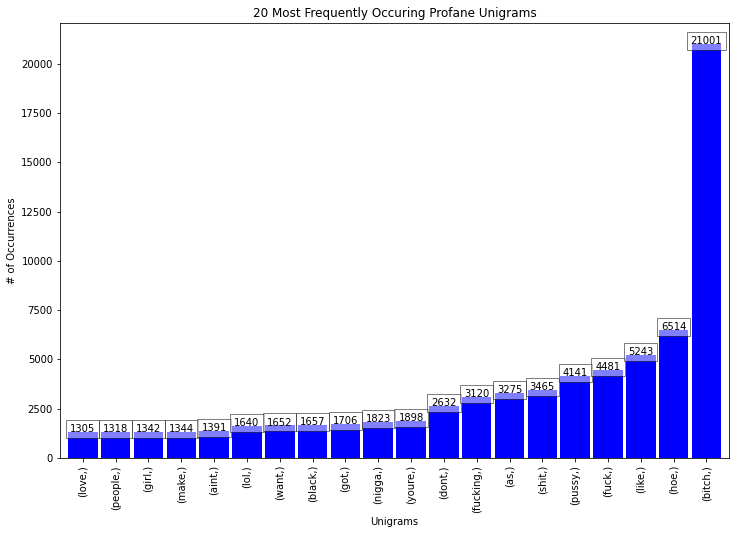

In [14]:
unigrams_series_p.sort_values().plot.bar(color='blue', width=.9, figsize=(12, 8))
plt.title('20 Most Frequently Occuring Profane Unigrams')
plt.xlabel('Unigrams')
plt.ylabel('# of Occurrences')
for i in range(len(unigrams_p)):
    plt.text(i, unigrams_p[i], unigrams_p[i], ha = 'center',
                 Bbox = dict(facecolor = 'white', alpha = .5))

C:\Users\hvvel\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  import sys


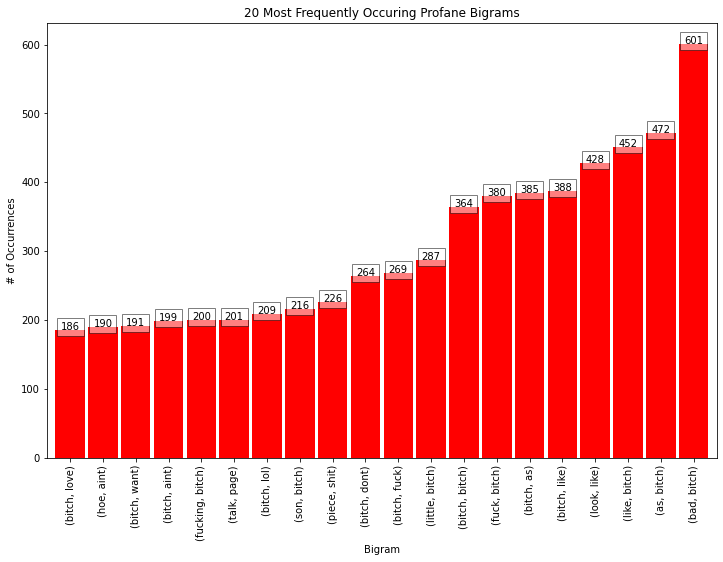

In [15]:
bigrams_series_p.sort_values().plot.bar(color='red', width=.9, figsize=(12, 8))
plt.title('20 Most Frequently Occuring Profane Bigrams')
plt.xlabel('Bigram')
plt.ylabel('# of Occurrences')
for i in range(len(bigrams_p)):
    plt.text(i, bigrams_p[i], bigrams_p[i], ha = 'center',
                 Bbox = dict(facecolor = 'white', alpha = .5))

C:\Users\hvvel\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  import sys


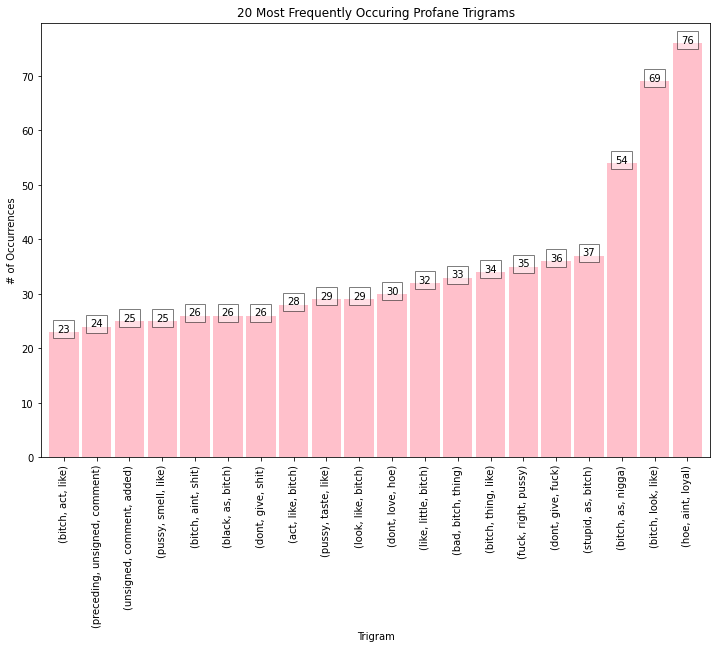

In [16]:
trigrams_series_p.sort_values().plot.bar(color='pink', width=.9, figsize=(12, 8))
plt.title('20 Most Frequently Occuring Profane Trigrams')
plt.xlabel('Trigram')
plt.ylabel('# of Occurrences')
for i in range(len(trigrams_p)):
    plt.text(i, trigrams_p[i], trigrams_p[i], ha = 'center',
                 Bbox = dict(facecolor = 'white', alpha = .5))